In [62]:
#This section read the csv data into a DataFrame in pandas

import pandas as pd
import requests
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


# What job titles have the highest salaries? 

In [2]:
# We copy the salaries DataFrame into a new one that we can modify 
top_salaries_df = salaries_df.copy()
#Eliminate any duplicated data
top_salaries_df.drop_duplicates()
# Create a groupby df with the count of each job title 
titles_count_df = top_salaries_df.groupby('job_title').size().reset_index(name='count')
# Sort the values by highest count to lowest
titles_count_df = titles_count_df.sort_values(by='count', ascending=False)
# Export Result
titles_count_df.to_csv('csv_output/job_title_count.csv', index=False)


# Having this new df we can filter out all jobs that do not meet certain count criteria

titles_count_df_fil = titles_count_df[titles_count_df['count'] >= 20]

titles_count_df_fil.to_csv('csv_output/job_title_count_filtered.csv', index=False)

In [3]:
#considering the filtered job title count dataframe we can now categorize each job title 
data_engineering = [
    "Data Engineer", 
    "Data Architect", 
    "Data Developer", 
    "ETL Developer", 
    "Data Integration Engineer", 
    "Data Modeler", 
    "Data Product Manager", 
    "Data Developer", 
    "ETL Developer", 
    "Data Integration Engineer"
]
data_science = [
    "Data Scientist", 
    "Research Scientist", 
    "Applied Scientist", 
    "Data Science", 
    "Machine Learning Scientist", 
    "Data Science Manager", 
    "Research Analyst", 
    "Data Science Consultant", 
    "Data Science Lead", 
    "Director of Data Science", 
    "Machine Learning Researcher", 
    "AI Scientist", 
    "Data Science Engineer", 
    "Data Quality Analyst"
]
data_analysis = [
    "Data Analyst", 
    "Analytics Engineer", 
    "Business Intelligence Analyst", 
    "BI Analyst", 
    "Data Analytics Manager", 
    "Business Intelligence", 
    "Business Intelligence Developer", 
    "Business Intelligence Engineer", 
    "Business Data Analyst", 
    "Decision Scientist", 
    "Computer Vision Engineer", 
    "Data Operations Analyst", 
    "Data Integration Specialist", 
    "Data Analytics Specialist", 
    "Business Intelligence Manager", 
    "Data Reporting Analyst", 
    "CRM Data Analyst"
]
machine_learning = [
    "Machine Learning Engineer", 
    "ML Engineer", 
    "Machine Learning Scientist", 
    "AI Engineer", 
    "AI Architect", 
    "Machine Learning Infrastructure Engineer", 
    "MLOps Engineer", 
    "Machine Learning Researcher"
]

In [4]:
# we create a function that will categorize the job if the jobtitle name matches any of strings inside of any of the list listed before

def categorize_job_title(title):
    
    if title in data_engineering:
        title = 'data_engineering'
    elif title in data_science:
        title = 'data_science'
    elif title in data_analysis:
        title = 'data_analysis'
    elif title in machine_learning:
        title = 'machine_learning'
    else:
        title = 'Too specific title'
    return title

# Create a new row that categorize the job title into one of the big 4 data roles previusly defined

top_salaries_df['category'] = top_salaries_df['job_title'].apply(categorize_job_title)

top_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,category
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,data_science
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L,Too specific title
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,data_science
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S,machine_learning
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L,Too specific title
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M,data_analysis
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M,Too specific title
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L,Too specific title
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L,data_analysis


In [5]:
# Now we calculate the Mean of the Salary in USD by category

mean_salary_cat = top_salaries_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_cat = mean_salary_cat[mean_salary_cat['category'] != 'Too specific title']

mean_salary_cat

,category,salary_in_usd
1,data_analysis,118804.292544
2,data_engineering,147614.251289
3,data_science,161701.251666
4,machine_learning,187687.502643


In [6]:
# analysis of each category 

describe_salary_cat = top_salaries_df.groupby('category')['salary_in_usd'].describe()

describe_salary_cat = describe_salary_cat[1:]

describe_salary_cat

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
data_analysis,3326.0,118804.292544,56628.107362,15000.0,81050.0,110000.0,146962.75,774000.0
data_engineering,3685.0,147614.251289,57945.045153,17025.0,107000.0,140000.0,180000.00,750000.0
data_science,4653.0,161701.251666,69154.395573,16000.0,120000.0,155000.0,200000.00,750000.0
machine_learning,1892.0,187687.502643,70861.536009,15966.0,142200.0,182000.0,226600.00,800000.0


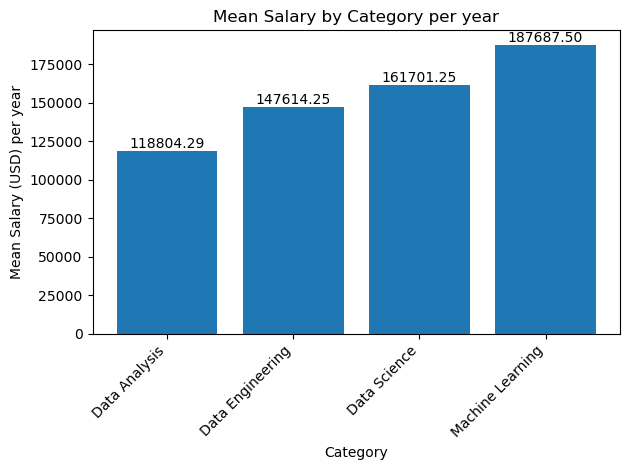

In [7]:
# Graph the result 

bars = plt.bar(mean_salary_cat['category'],mean_salary_cat['salary_in_usd'])

plt.xlabel('Category')
plt.ylabel('Mean Salary (USD) per year')
plt.title('Mean Salary by Category per year')
custom_labels = ['Data Analysis','Data Engineering', 'Data Science', 'Machine Learning']
plt.xticks(mean_salary_cat['category'], custom_labels, rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.savefig('Figures/JavierFig1.png', bbox_inches='tight')
plt.tight_layout()
plt.show()



Based on the provided information and analysis, we can draw the following conclusions regarding which category tends to make more money per year:

1. **Comparison of Mean Salaries by Category**: From the graph, it appears that machine learning-related job titles have the highest average salary, followed by data science, data engineering, and data analysis. This suggests that individuals in the machine learning category tend to earn more on average compared to other categories.

2. **Consideration of Specificity of Job Titles**: The categorization of job titles based on the number of entries (>20) helps to provide a more generalized view of salary trends across broader job categories. This approach allows for a comparison of more common job titles, providing insights into the overall salary trends within each category.

3. **Analysis of Standard Deviation**: The statistical analysis reveals that data engineering and data analysis categories have similar standard deviations, indicating similar levels of variability in salaries within these categories. Conversely, data science and machine learning categories exhibit greater variance in salaries, suggesting more variability in earnings within these categories.

4. **Inclusion of International Data**: Including data from other countries around the world provides additional variance in the statistical analysis, offering a broader perspective on salary trends across different regions.

Overall, based on the provided analysis, it can be concluded that machine learning-related job titles tend to have the highest average salaries, while data analysis and data engineering categories exhibit similar levels of variability in salaries. However, data science and machine learning categories show greater variability in earnings, possibly reflecting the diverse nature of roles and industries within these fields.


# Compare salaries between the United States and the rest of the countries in the dataset

In [8]:
# copy the DataFrame that contains category column
country_salaries_df = top_salaries_df.copy()

country_count_df = country_salaries_df.groupby('company_location').size().reset_index(name='count')
# Sort the values by highest count to lowest
country_count_df = country_count_df.sort_values(by='count', ascending=False)
# Export Result
country_count_df.to_csv('csv_output/country_count.csv', index=False)

In [9]:
# defined the function that will contain the api query to get the Lat and lon information
def get_coordinates(country_code):
    
    url = f'https://nominatim.openstreetmap.org/search?q={country_code}&format=jsonv2'
    
    response = requests.get(url).json()
    
    Lat = float(response[0]['lat'])
    Lon = float(response[0]['lon'])
    return Lat, Lon


In [10]:
#store the lat and lon numbers to the country count dataframe
country_count_df[['Latitude', 'Longitude']] = country_count_df['company_location'].apply(lambda x: pd.Series(get_coordinates(x)))

country_count_df.to_csv('csv_output/country_count_coord.csv')
country_count_df

,company_location,count,Latitude,Longitude
74,US,12975,39.783730,-100.445882
27,GB,655,54.702354,-3.276575
11,CA,392,61.066692,-107.991707
24,ES,127,39.326068,-4.837979
18,DE,98,51.163818,10.447831
...,...,...,...,...
29,GI,1,36.128593,-5.347476
10,BS,1,24.773655,-78.000055
21,EC,1,-1.339767,-79.366697
20,DZ,1,28.000027,2.999983


In [11]:
map_plot_1 = country_count_df.hvplot.points(
    x="Longitude",
    y="Latitude",
    size = "count",
    hover_cols=['company_location', 'Count'],
    geo=True,
    tiles = "OSM",
    color = 'company_location',
    width = 800,
    height = 600,
    alpha = 0.5
)

#hvplot.save(map_plot_1, 'Figures/JavierFig2.png')
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (company_location,count)

In [12]:
# Split Us salaries from the rest of the world and other 4 df from the top 5 
us_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'US']

not_us_salary_df = country_salaries_df[country_salaries_df['company_location'] != 'US']

gb_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'GB']

ca_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'CA']

es_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'ES']

de_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'DE']

In [13]:
# Analyse Us salaries compared to non Us salaries to see if the low count actually influence on the salaries

us_salary_df['salary_in_usd'].describe()

count     12975.000000
mean     157410.126474
std       66151.750528
min       20000.000000
25%      111600.000000
50%      148000.000000
75%      191475.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

In [14]:
not_us_salary_df['salary_in_usd'].describe()

count      1863.000000
mean      97393.819646
std       65608.455145
min       15000.000000
25%       51676.000000
50%       79981.000000
75%      123040.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

In [15]:
mean_salary_us = us_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_us = mean_salary_us[mean_salary_us['category'] != 'Too specific title']

mean_salary_us

,category,salary_in_usd
1,data_analysis,123306.501201
2,data_engineering,153935.059665
3,data_science,169745.182171
4,machine_learning,195156.919210


In [16]:
mean_salary_not_us = not_us_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_not_us = mean_salary_not_us[mean_salary_not_us['category'] != 'Too specific title']

mean_salary_not_us

,category,salary_in_usd
1,data_analysis,86872.569343
2,data_engineering,95704.612500
3,data_science,99916.061567
4,machine_learning,131210.601810


In [17]:
mean_salary_gb = gb_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_gb = mean_salary_gb[mean_salary_gb['category'] != 'Too specific title']

mean_salary_gb

,category,salary_in_usd
1,data_analysis,88415.598985
2,data_engineering,88439.187845
3,data_science,101036.541667
4,machine_learning,133495.053571


In [18]:
mean_salary_ca = ca_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_ca = mean_salary_ca[mean_salary_ca['category'] != 'Too specific title']

mean_salary_ca

,category,salary_in_usd
1,data_analysis,118380.139535
2,data_engineering,147777.543210
3,data_science,153569.378788
4,machine_learning,175090.534483


In [19]:
mean_salary_es = es_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_es = mean_salary_es[mean_salary_es['category'] != 'Too specific title']

mean_salary_es

,category,salary_in_usd
1,data_analysis,41736.894737
2,data_engineering,65351.416667
3,data_science,54796.347826
4,machine_learning,69456.833333


In [20]:
mean_salary_de = de_salary_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_de = mean_salary_de[mean_salary_de['category'] != 'Too specific title']

mean_salary_de

,category,salary_in_usd
1,data_analysis,64742.666667
2,data_engineering,85671.000000
3,data_science,73803.310345
4,machine_learning,130056.777778


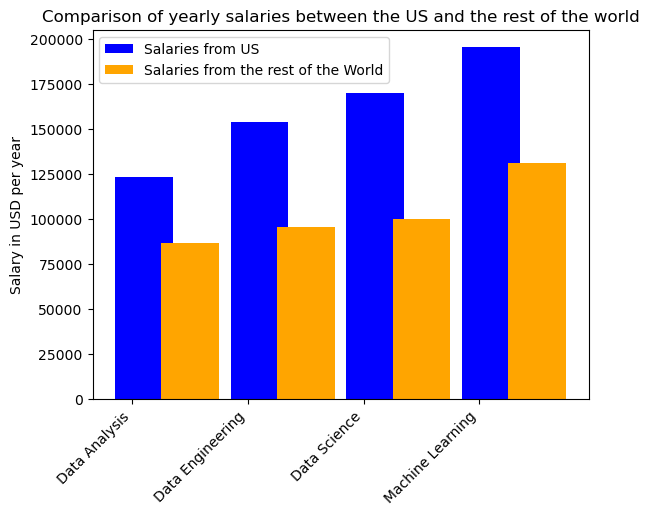

In [21]:
# Settings for the second graph which shows the salaries comparasion from the us and the rest of the world
index = np.arange(len(mean_salary_us['category']))
bar_width = 0.5
group_spacing = 0.2
custom_labels = ['Data Analysis','Data Engineering', 'Data Science', 'Machine Learning']

plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_not_us['salary_in_usd'],bar_width, color='orange', label='Salaries from the rest of the World')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and the rest of the world')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig2.png', bbox_inches='tight')
plt.show()

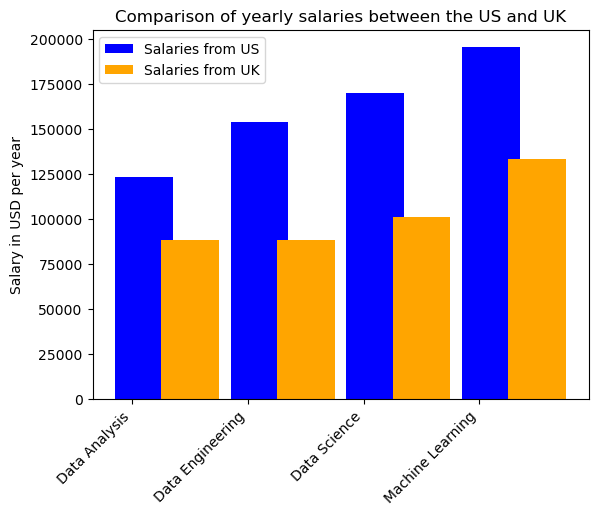

In [22]:
# Settings for the second graph which shows the salaries comparasion from the us and uk
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_gb['salary_in_usd'],bar_width, color='orange', label='Salaries from UK')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and UK')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig3.png', bbox_inches='tight')
plt.show()

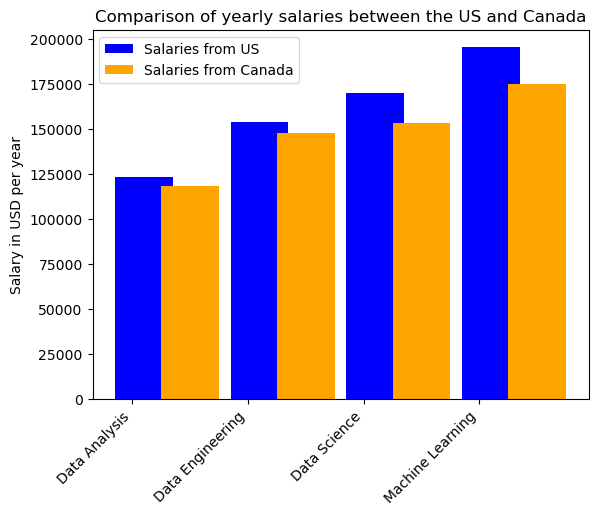

In [23]:
# Settings for the second graph which shows the salaries comparasion from the us and canada
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_ca['salary_in_usd'],bar_width, color='orange', label='Salaries from Canada')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and Canada')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig4.png', bbox_inches='tight')
plt.show()

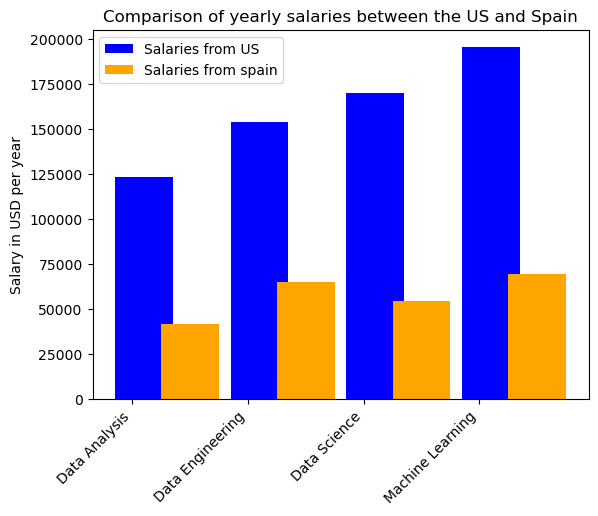

In [24]:
# Settings for the second graph which shows the salaries comparasion from the us and spain
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_es['salary_in_usd'],bar_width, color='orange', label='Salaries from spain')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and Spain')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig5.png', bbox_inches='tight')
plt.show()

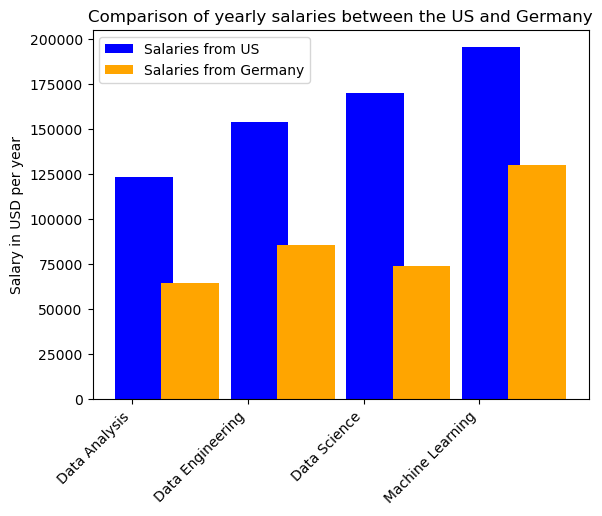

In [25]:
# Settings for the second graph which shows the salaries comparasion from the us and germany
plt.bar(index + group_spacing / 2, mean_salary_us['salary_in_usd'],bar_width, color='blue', label='Salaries from US')

plt.bar(index + bar_width , mean_salary_de['salary_in_usd'],bar_width, color='orange', label='Salaries from Germany')

plt.xticks(index + bar_width / 2, mean_salary_us['category'])
plt.ylabel('Salary in USD per year')
plt.title('Comparison of yearly salaries between the US and Germany')


plt.xticks(index, custom_labels, rotation=45, ha='right')
plt.legend()
plt.savefig('Figures/JavierFig6.png', bbox_inches='tight')
plt.show()

**Comparison of US Salaries with Rest of the World**

In order to compare US salaries with those from the rest of the world, we initially observed a significant disparity in the number of entries, with the dataset predominantly comprising US salaries. This disparity was reflected in the initial bar graph showcasing a notable difference in mean salaries across the previously established four categories. The discrepancy observed might be attributed to variations in the cost of living across different countries, potentially influencing salary ranges.

To delve deeper into the comparison, we conducted additional analysis focusing on the top four countries following the US in terms of salary entries. It emerged that wages in European countries tended to be lower, while Canadian wages exhibited closer proximity to US salaries, despite all being considered first-world countries with high living costs.

Furthermore, a statistical examination of wages between US and non-US entries indicated that the standard deviation remained relatively unchanged. The distribution and variance appeared consistent, with the US exhibiting a standard deviation of $66,151 USD, while the rest of the world's wages had a standard deviation of $65,608 USD.

Graphical representations further reinforced these observations, revealing a consistent trend where wages across most categories mirrored the pattern observed in the initial analysis, with data analysis roles being the least remunerated and machine learning-related jobs emerging as the highest paid roles.

Overall, these findings underscore the complex interplay between geographical location, cost of living, and salary discrepancies, offering valuable insights into global wage disparities across various job categories.


# Was there a salary increase between 2023 and this year?

##### Table 1 - salary increase in general between 2023 and 2024

In [26]:
# Created a new data frame that only includes columns 'work_year' and 'salary_in_usd'
yearandsalary_df = salaries_df[['work_year', 'salary_in_usd']]
yearandsalary_df.head()

,work_year,salary_in_usd
0,2021,40038
1,2021,36259
2,2020,35735
3,2021,77364
4,2022,95386


In [27]:
# Created a new data frame that only includes 2023 in column 'work_year'
only2023salary_df = yearandsalary_df.drop(yearandsalary_df[yearandsalary_df['work_year'].isin([2020,2021,2022,2024])].index)
only2023salary_df.head()

,work_year,salary_in_usd
10,2023,60805
11,2023,60207
16,2023,48644
19,2023,43779
21,2023,38915


In [28]:
# Created a new data frame that only includes 2024 in column 'work_year'
only2024salary_df = yearandsalary_df.drop(yearandsalary_df[yearandsalary_df['work_year'].isin([2020,2021,2022,2023])].index)
only2024salary_df.head()

,work_year,salary_in_usd
20,2024,39615
33,2024,27611
66,2024,800000
68,2024,774000
69,2024,750000


In [29]:
# Calculate the average salary in 2023
average2023salary = only2023salary_df[only2023salary_df['work_year'] == 2023]['salary_in_usd'].mean()
print(f'The average salary in 2023 was ${average2023salary:.2f}')

The average salary in 2023 was $153732.66


In [30]:
# Calculate the average salary in 2024
average2024salary = only2024salary_df[only2024salary_df['work_year'] == 2024]['salary_in_usd'].mean()
print(f'The average salary in 2024 was ${average2024salary:.2f}')

The average salary in 2024 was $151510.09


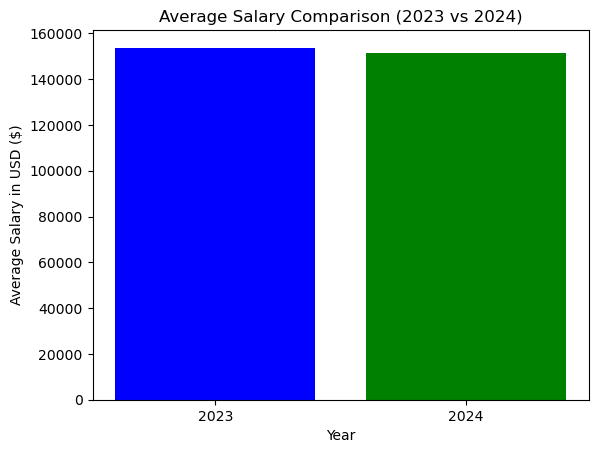

In [31]:
# Creating a bar plot

years = ['2023', '2024']
averages = [average2023salary, average2024salary]

plt.bar(years,averages, color=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Average Salary in USD ($)')
plt.title('Average Salary Comparison (2023 vs 2024)')
plt.savefig('Figures/EugenioFig1.png', bbox_inches='tight')
plt.show()

### Analysis of : Was there a salary increase between 2023 and this year?

In order to find if there was a salary increment between 2023 and 2024, we first created a new dataframe that isolated the information that we really needed for this question which was work year and salary in usd. This new dataframe included every year from the data set, so in order to only filter the years 2023 and 2024, we created 2 new dataframes, one for each year. From these new dataframes, we calculated the average salary in usd from each year. Finally we proceeded to create a bar plot to represent and compare both average salaries.

With the results, we concluded that the average salaries don't vary that much. There is a slight decrement going into 2024 in the average salary.

##### Table 2 - salary increase in per country between 2023 and 2024

In [32]:
# Creating a new Data Frame for 2023 with only 3 columns: 'work_year', 'salary_in_usd' and 'employee_residence'
salary_per_country2023_df = salaries_df[['work_year', 'salary_in_usd', 'employee_residence']]
salary_per_country2023_df = salary_per_country2023_df[salary_per_country2023_df['work_year'] == 2023]

# Calculating the average salary per country in 2023
avgsalarybycountry_2023 = salary_per_country2023_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
avgsalarybycountry_2023.head()

,employee_residence,salary_in_usd
0,AD,50745.000000
1,AM,33500.000000
2,AR,58333.333333
3,AT,60462.000000
4,AU,163288.823529


In [33]:
# Creating a new Data Frame for 2024 with only 3 columns: 'work_year', 'salary_in_usd' and 'employee_residence'
salary_per_country2024_df = salaries_df[['work_year', 'salary_in_usd', 'employee_residence']]
salary_per_country2024_df = salary_per_country2024_df[salary_per_country2024_df['work_year'] == 2024]

# Calculating the average salary per country in 2023
avgsalarybycountry_2024 = salary_per_country2024_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
avgsalarybycountry_2024.head()

,employee_residence,salary_in_usd
0,AE,65000.000000
1,AR,88500.000000
2,AT,64166.000000
3,AU,133389.565217
4,BA,30000.000000


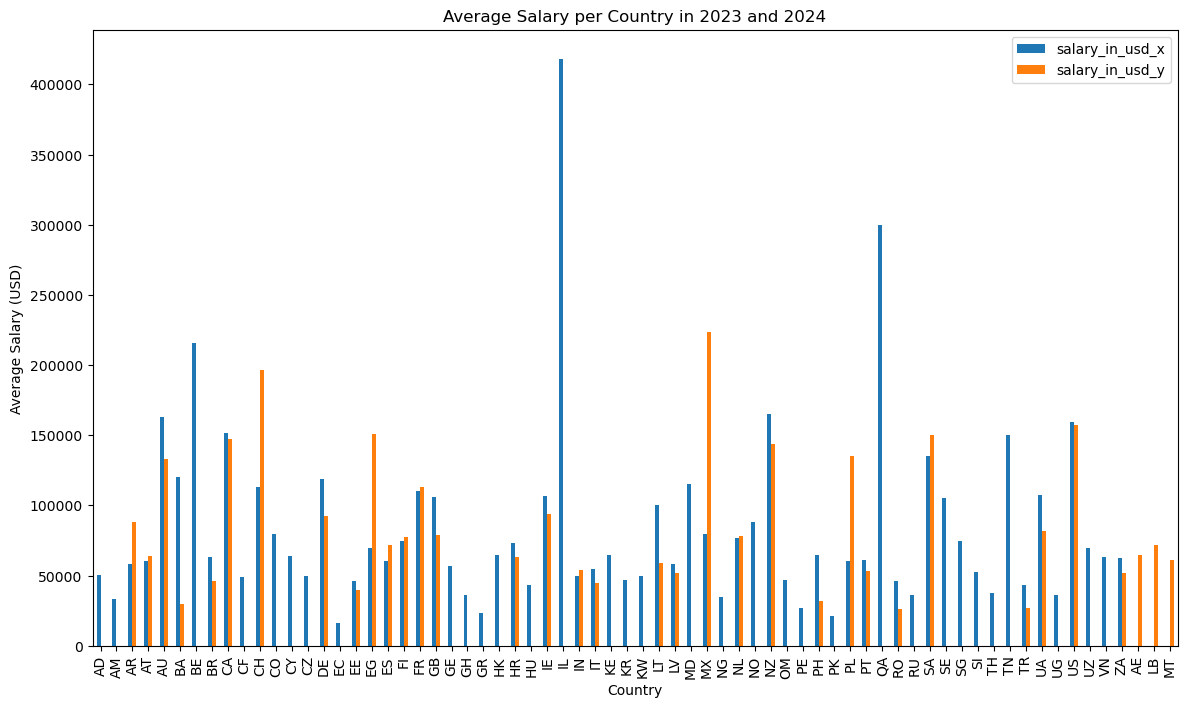

In [34]:
# Merging the 2023 and 2024 Data Frames on 'employee_residence' to create a combined Data Frame
combined_avg_salaries_df = pd.merge(avgsalarybycountry_2023, avgsalarybycountry_2024, on='employee_residence', how='outer')

# Setting the index to 'employee_residence'
combined_avg_salaries_df.set_index('employee_residence', inplace=True)

# Plotting the Data
combined_avg_salaries_df.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary per Country in 2023 and 2024')
plt.xticks(rotation=90)
plt.savefig('Figures/EugenioFig2.png', bbox_inches='tight')

plt.show()

In this next graph, we wanted to dive deeper into the salaries, especifically by country. Here, we found which countries had an increment or decrement in their average salaries from 2023 to 2024. To do this, we had to use the variables of employee residence and salary in usd. We created 2 new dataframes, one for each year. This new dataframes had a list of every country present in the database, along with the average salary corresponding to that country. The next step was to merge the dataframes and create a new combined dataframe, that listed every country present in the 2023 and 2024 dataframes, along with their average salaries. Finally, we created a bar plot that showed every country and their respective average salary in 2023 and 2024.

With this in mind, we were able to find that of the 68 countries present, 12 had a salary increment, 19 had a decrement and 37 other countries did not have presence in the dataset in both years.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Depending on the size of the company, what do companies tend to look for more?

In [35]:
# Group the data by company location and company size, and count the number of companies
groupedcountries_data = salaries_df.groupby(['company_location', 'company_size']).size().unstack(fill_value=0)
groupedcountries_data

company_size,L,M,S
company_location,,,
AD,0,0,1
AE,3,0,2
AM,0,0,1
AR,1,6,0
AS,1,1,1
...,...,...,...
TR,2,2,2
UA,0,9,1
US,723,12185,67


In [36]:
# Calculate the total number of companies in each country
groupedcountries_data['total_companies'] = groupedcountries_data.sum(axis=1)
groupedcountries_data

company_size,L,M,S,total_companies
company_location,,,,
AD,0,0,1,1
AE,3,0,2,5
AM,0,0,1,1
AR,1,6,0,7
AS,1,1,1,3
...,...,...,...,...
TR,2,2,2,6
UA,0,9,1,10
US,723,12185,67,12975


In [37]:
# Calculate the proportion of each company size in each country (Large, Medium or Small)
groupedcountries_data['Large'] = groupedcountries_data['L'] / groupedcountries_data['total_companies']
groupedcountries_data['Medium'] = groupedcountries_data['M'] / groupedcountries_data['total_companies']
groupedcountries_data['Small'] = groupedcountries_data['S'] / groupedcountries_data['total_companies']
groupedcountries_data

company_size,L,M,S,total_companies,Large,Medium,Small
company_location,,,,,,,
AD,0,0,1,1,0.000000,0.000000,1.000000
AE,3,0,2,5,0.600000,0.000000,0.400000
AM,0,0,1,1,0.000000,0.000000,1.000000
AR,1,6,0,7,0.142857,0.857143,0.000000
AS,1,1,1,3,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...
TR,2,2,2,6,0.333333,0.333333,0.333333
UA,0,9,1,10,0.000000,0.900000,0.100000
US,723,12185,67,12975,0.055723,0.939114,0.005164


In [38]:
# Sort the data by total number of companies
groupedcountries_data = groupedcountries_data.sort_values(by='total_companies', ascending=False)
groupedcountries_data

company_size,L,M,S,total_companies,Large,Medium,Small
company_location,,,,,,,
US,723,12185,67,12975,0.055723,0.939114,0.005164
GB,27,615,13,655,0.041221,0.938931,0.019847
CA,28,359,5,392,0.071429,0.915816,0.012755
ES,14,111,2,127,0.110236,0.874016,0.015748
DE,29,48,21,98,0.295918,0.489796,0.214286
...,...,...,...,...,...,...,...
GI,1,0,0,1,1.000000,0.000000,0.000000
BS,0,1,0,1,0.000000,1.000000,0.000000
EC,1,0,0,1,1.000000,0.000000,0.000000


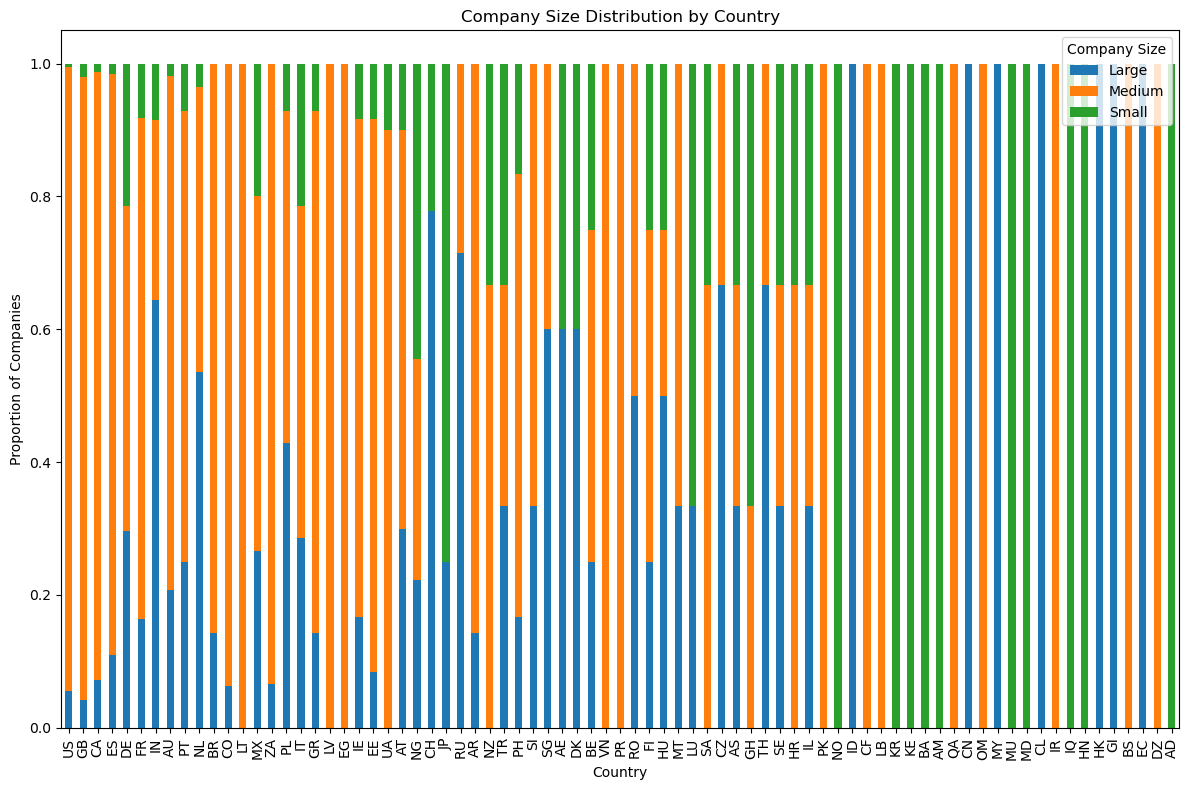

In [39]:
# Plot the Data
fig, ax = plt.subplots(figsize=(12, 8))

groupedcountries_data[['Large', 'Medium', 'Small']].plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Company Size Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Proportion of Companies')
ax.legend(title='Company Size')

plt.tight_layout()
plt.savefig('Figures/EugenioFig3.png', bbox_inches='tight')
plt.show()

In order to find if there was a relationship between company size and country of origin, we first had to create a dataframe that grouped the data by company location, company size and count the number of companies in each category. After calculating the proportion each company (small, medium or large) had in each country, we proceeded to graph the information into a stacked bar plot.

This shows us the proportion of all the different sized companies in each country. We could find big countries like the United States, Great Britain and Canada have a larger number of medium companies. However, medium companies are the most present in almost every country, making it the staple and most popular kind of company size. There are some exceptions, such as France, Japan, Russia, among others, that have more than 50% in large sized companies.

# Is there a correlation between job title ratio and company size?
****


In [40]:
#Copy the original dataframe into a new variable
companysizedf=salaries_df.copy()

#### Separate the company by sizes
**Rows by company size**

In [41]:
#Filter the rows 'company size' of the dataset (Small)
smallcompanydf=companysizedf[companysizedf['company_size']=='S']
smallcompanydf.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
11,2023,EN,FT,AI Programmer,4950806,INR,60207,IN,0,IN,S
14,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
31,2022,MI,FL,Applied Machine Learning Scientist,2400000,INR,30523,IN,100,IN,S


In [42]:
#Filter the rows 'company size' of the dataset (Medium)
mediumcompanydf=companysizedf[companysizedf['company_size']=='M']
mediumcompanydf.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
22,2023,MI,FT,Data Analytics Manager,3200000,INR,38915,IN,50,IN,M
28,2023,MI,FT,NLP Engineer,2700000,INR,32834,IN,100,IN,M
29,2022,MI,FT,Data Scientist,2500000,INR,31795,IN,100,US,M
30,2021,MI,FT,Data Scientist,2500000,INR,33808,IN,0,IN,M


In [43]:
#Filter the rows 'company size' of the dataset (Large)
largecompanydf=companysizedf[companysizedf['company_size']=='L']
largecompanydf.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


#### Filter according to the job position.

**Jobs requesting more according to size**

In [44]:
smallcompanydf.value_counts('job_title')

job_title
Data Scientist                        31
Machine Learning Engineer             22
Data Analyst                          19
ML Engineer                            9
Data Engineer                          9
Machine Learning Scientist             8
AI Scientist                           7
AI Developer                           4
BI Data Analyst                        4
Data Science Consultant                4
Computer Vision Engineer               4
Lead Data Engineer                     4
Research Scientist                     4
Lead Data Scientist                    3
AI Programmer                          3
Big Data Engineer                      3
Research Engineer                      3
Machine Learning Researcher            2
Machine Learning Developer             2
NLP Engineer                           2
Computer Vision Software Engineer      2
Product Data Analyst                   2
Data Analyst Lead                      2
Analytics Engineer                     2
Lead M

In [45]:
mediumcompanydf.value_counts('job_title')

job_title
Data Engineer                        3033
Data Scientist                       2849
Data Analyst                         2122
Machine Learning Engineer            1466
Research Scientist                    421
                                     ... 
Sales Data Analyst                      1
Software Data Engineer                  1
Staff Data Analyst                      1
Computer Vision Software Engineer       1
Staff Machine Learning Engineer         1
Name: count, Length: 126, dtype: int64

In [46]:
largecompanydf.value_counts('job_title')

job_title
Applied Scientist                 223
Data Scientist                    135
Data Engineer                     120
Business Intelligence Engineer     98
Machine Learning Engineer          54
                                 ... 
Head of Machine Learning            1
Data Analytics Associate            1
Azure Data Engineer                 1
Analytics Engineering Manager       1
Staff Data Analyst                  1
Name: count, Length: 95, dtype: int64

#### Charting company sizes according to job position

**The best way to display the results (according to us) is to show it in a pie chart for each size**

<function matplotlib.pyplot.show(close=None, block=None)>

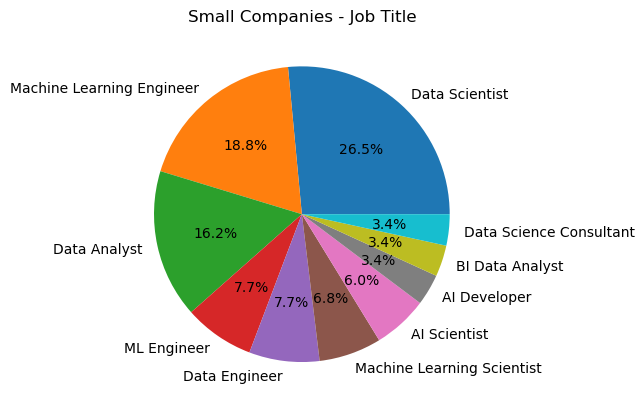

In [47]:
#Create a new variable to generate the graphs(Small)
count_small_companies=smallcompanydf.value_counts('job_title')
first_5_small =count_small_companies.head(10)
first_5_labels_small = first_5_small.index
plt.pie(first_5_small,labels=first_5_labels_small,autopct='%1.1f%%')
plt.title('Small Companies - Job Title')
plt.savefig('Figures/PriscyMD_Fig1_Small_JobTitle.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

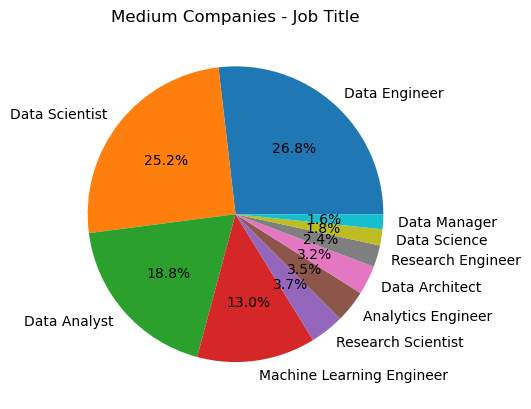

In [48]:
#Create a new variable to generate the graphs(Medium)
count_medium_companies=mediumcompanydf.value_counts('job_title')
first_5_medium =count_medium_companies.head(10)
first_5_labels_medium = first_5_medium.index
plt.pie(first_5_medium,labels=first_5_labels_medium,autopct='%1.1f%%')
plt.title('Medium Companies - Job Title')
plt.savefig('Figures/PriscyMD_Fig2_Medium_JobTitle.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

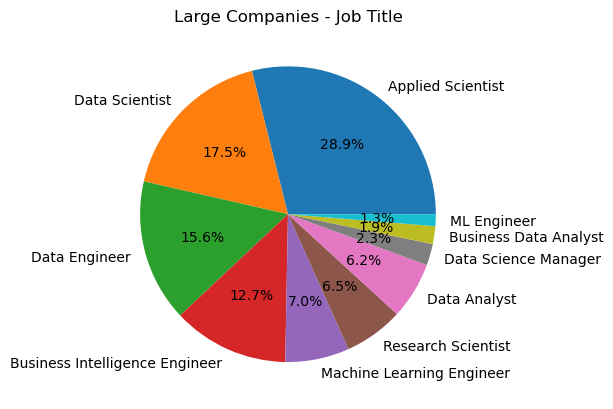

In [49]:
#Create a new variable to generate the graphs(Large)
count_large_companies=largecompanydf.value_counts('job_title')
first_5_large =count_large_companies.head(10)
first_5_labels_large = first_5_large.index
plt.pie(first_5_large,labels=first_5_labels_large,autopct='%1.1f%%')
plt.title('Large Companies - Job Title')
plt.savefig('Figures/PriscyMD_Fig3_Large_JobTitle')
plt.show

#### Statistical analysis

**Represent the results in statistical results.**

In [50]:
#Creation of a variable in which a statistical summary is grouped together.
job_description_size=companysizedf.groupby('company_size')['job_title'].describe()
job_description_size

,count,unique,top,freq
company_size,,,,
L,983,95,Applied Scientist,223
M,13674,126,Data Engineer,3033
S,181,50,Data Scientist,31


### Analisys Description

**According to the analysis, the most frequent value related to the job position according to the size of the company are:**

- Small Company: Data Scientist 🔻

➡︎ (freq) The frequency in which this position appears is **31** times.

➡︎ (unique) The unique values within the column are **50** data science values found.

➡︎ (count) The number of occurrences in the column is **181** times.

- Medium Company: Data Engineer 🔻

➡︎ (freq) The frequency in which this position appears is **3,033** times.

➡︎ (unique) The unique values within the column are **126** data science values found.

➡︎ (count) The number of occurrences in the column is **13,674** times.

- Large Company: Applied Scientist 🔻

➡︎ (freq) The frequency in which this position appears is **223** times.

➡︎ (unique) The unique values within the column are **95** data science values found.

➡︎ (count) The number of occurrences in the column is **983** times.

### Conclusions

**Depending on the size of the company, what do companies tend to look for more?**

*The companies have a tendency in the area of data regardless of size, the only variance is the area in which they perform and manage this data, we could observe that the same job titles are conserved but they move according to the size of the company.*

# What is the distribution of experience levels among data science professionals?
----


In [51]:
#Copy the original dataframe into a new variable
companysizedf=salaries_df.copy()

In [52]:
#Count the rows 'Experience Level' of the dataset
experienceleveldf=companysizedf.value_counts('experience_level')
experienceleveldf

experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

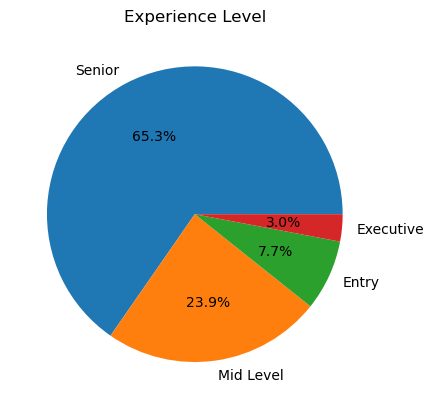

In [53]:
#Show on the graph the experience levels
plt.pie(experienceleveldf,labels=['Senior','Mid Level','Entry','Executive'],autopct='%1.1f%%')
plt.title('Experience Level')
plt.savefig('Figures/Priscy_ExperienceLevel_General.png')
plt.show

#### Distribution of experience level
**By companies size**

In [54]:
# Counting the experience level values according to the size of the company (Small)
experiencelevel_smallcompanies=smallcompanydf.value_counts('experience_level')
experiencelevel_smallcompanies

experience_level
MI    67
SE    55
EN    51
EX     8
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

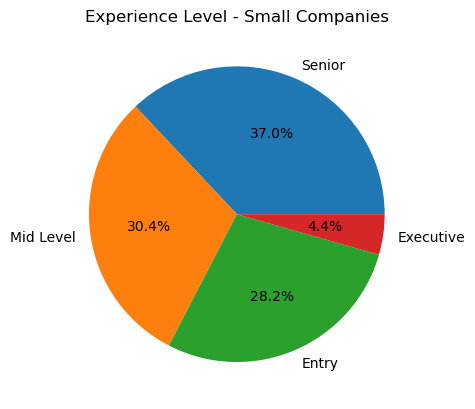

In [55]:
#Plotting experience level values by company size
plt.pie(experiencelevel_smallcompanies,labels=['Senior','Mid Level','Entry','Executive'],autopct='%1.1f%%')
plt.title('Experience Level - Small Companies')
plt.savefig('Figures/Priscy_ExperienceLevel1_Small.png')
plt.show

In [56]:
# Counting the experience level values according to the size of the company (Medium)
experiencelevel_mediumcompanies=mediumcompanydf.value_counts('experience_level')
experiencelevel_mediumcompanies

experience_level
SE    9104
MI    3189
EN     971
EX     410
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

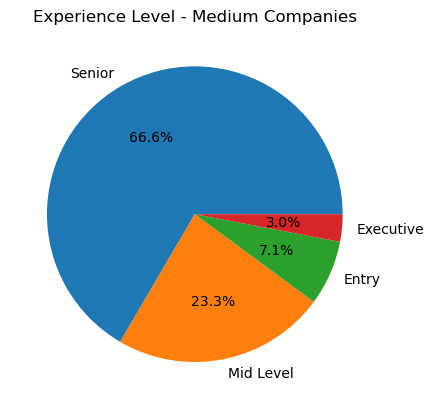

In [57]:
#Plotting experience level values by company size
plt.pie(experiencelevel_mediumcompanies,labels=['Senior','Mid Level','Entry','Executive'],autopct='%1.1f%%')
plt.title('Experience Level - Medium Companies')
plt.savefig('Figures/Priscy_ExperienceLevel2_Medium.png')
plt.show

In [58]:
# Counting the experience level values according to the size of the company (Large)
experiencelevel_largecompanies=largecompanydf.value_counts('experience_level')
experiencelevel_largecompanies

experience_level
SE    537
MI    297
EN    126
EX     23
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

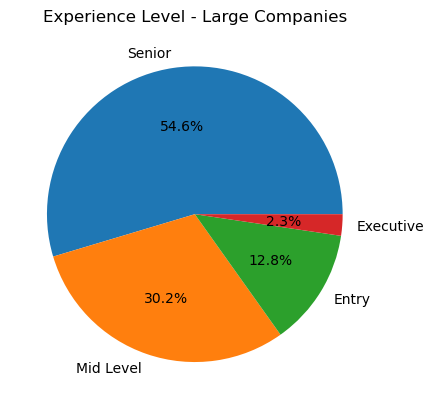

In [59]:
#Plotting experience level values by company size
plt.pie(experiencelevel_largecompanies,labels=['Senior','Mid Level','Entry','Executive'],autopct='%1.1f%%')
plt.title('Experience Level - Large Companies')
plt.savefig('Figures/Priscy_ExperienceLevel3_Large.png')
plt.show

#### Statistical analysis
**Represent the results in statistical graphs.**

In [60]:
#Creation of a variable in which a statistical summary is grouped together.
experience_description_size=companysizedf.groupby('company_size')['experience_level'].describe()
experience_description_size

,count,unique,top,freq
company_size,,,,
L,983,4,SE,537
M,13674,4,SE,9104
S,181,4,MI,67


### Analisys Description

**According to the analysis, the most frequent value related to the experience level according to the size of the company are:**

- Small Company: Mid Level 🔻

➡︎ (freq) The frequency in which this position appears is **67** times.

➡︎ (unique) The unique values within the column are **4** data science values found.

➡︎ (count) The number of occurrences in the column is **181** times.

- Medium Company: Senior 🔻

➡︎ (freq) The frequency in which this position appears is **9,104** times.

➡︎ (unique) The unique values within the column are **4** data science values found.

➡︎ (count) The number of occurrences in the column is **13,674** times.

- Large Company: Senior 🔻

➡︎ (freq) The frequency in which this position appears is **537** times.

➡︎ (unique) The unique values within the column are **4** data science values found.

➡︎ (count) The number of occurrences in the column is **983** times.

### Conclusions

**What is the distribution of experience levels among data science professionals?**

*The results indicate that there is a large growth of work for those with senior experience from small to large companies, however in small companies, there is a slight margin between MID and senior level that we can quantify the state of the differences, they are not statistically significant.*

***

# Does the compay size influence the salary?

Statistics of Salary by Company Size:
------------------------------------------------------------
Company Size    Count      Mean       Std        Min        25%        50%        75%       
------------------------------------------------------------
L               983        139602.46  74183.85   15000.0    79833.0    136000.0   200000.0   423000.0  
M               13674      151450.54  68295.97   15000.0    105000.0   143150.0   186000.0   800000.0  
S               181        86614.57   58501.97   15809.0    50000.0    70179.0    114047.0   416000.0  
------------------------------------------------------------


c:\Users\Javier Alarcon\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


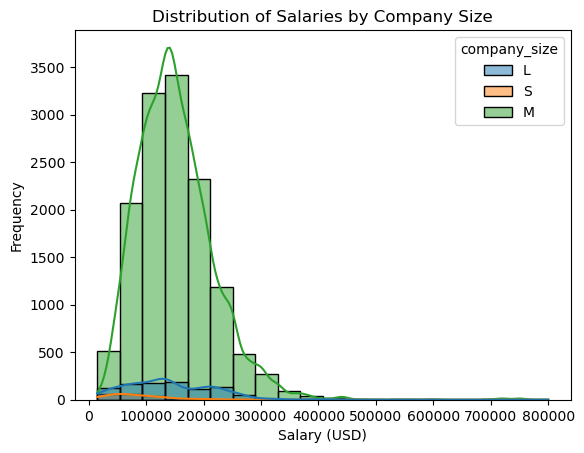

<Axes: title={'center': 'Mean Salary by Company Size'}, xlabel='Company Size', ylabel='Mean Salary'>

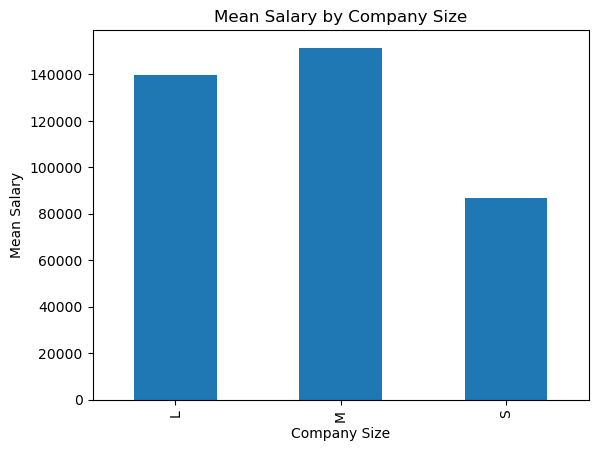

In [63]:
# Calculate statistics of salary by company size
salaries_by_company_size = salaries_df.groupby('company_size')['salary_in_usd'].describe()

# Print statistics of salary by company size
print("Statistics of Salary by Company Size:")
print("-" * 60)
print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Company Size", "Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"))
print("-" * 60)

for company_size, stats in salaries_by_company_size.iterrows():
    count = int(stats['count'])
    mean = round(stats['mean'], 2)
    std = round(stats['std'], 2)
    min_salary = round(stats['min'], 2)
    percentile_25 = round(stats['25%'], 2)
    median = round(stats['50%'], 2)
    percentile_75 = round(stats['75%'], 2)
    max_salary = round(stats['max'], 2)
    print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(company_size, count, mean, std, min_salary, percentile_25, median, percentile_75, max_salary))

print("-" * 60)


# Histogram of distribution of Salary 
sns.histplot(data=salaries_df, x='salary_in_usd', hue='company_size', kde=True, bins=20)
plt.title('Distribution of Salaries by Company Size')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

#Bar Graph
salaries_by_company_size['mean'].plot(kind='bar', xlabel='Company Size', ylabel='Mean Salary', title='Mean Salary by Company Size')

# Conclusion:
#### The results of the analysis suggest that medium-sized companies offer even better salaries than large companies. This finding may indicate that medium-sized companies have more flexibility in offering competitive salaries to attract and retain talent, compared to larger corporations where salary structures may be more rigid.

# How much does remote or in-site job impact salary?

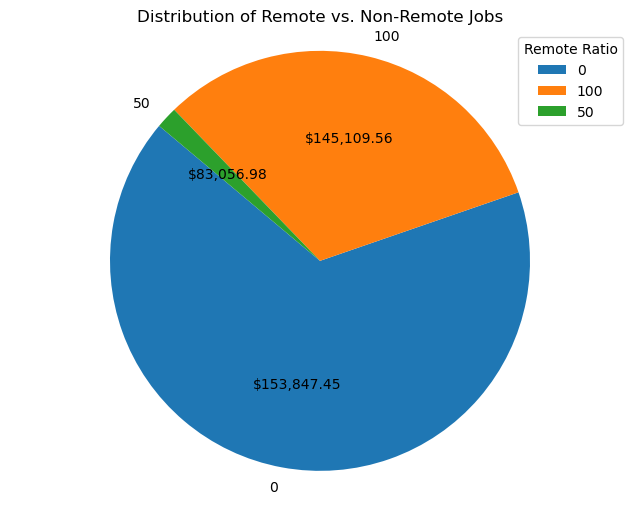

In [64]:
# Calculate proportion of in-site and remote jobs
remote_ratio_counts = salaries_df['remote_ratio'].value_counts(normalize=True) * 100

# Make cake graph
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Remote vs. Non-Remote Jobs')
plt.axis('equal')

# Add values to each section of graph
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"${salaries_df[salaries_df['remote_ratio'] == remote_ratio_counts.index[i]]['salary_in_usd'].mean():,.2f}")

plt.legend(title="Remote Ratio", loc="best")

plt.show()

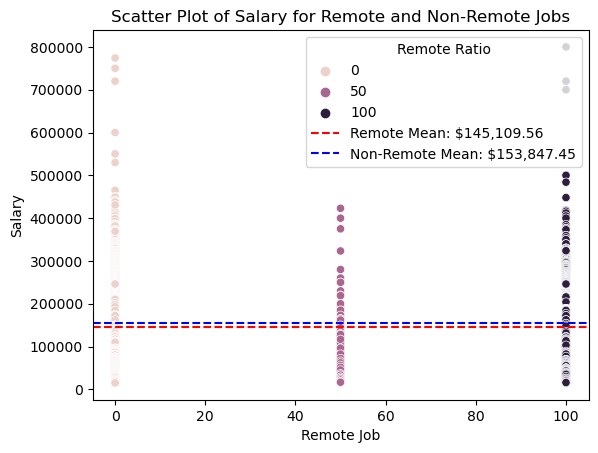

In [65]:
# Make scatter plot
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=salaries_df, hue='remote_ratio')
plt.xlabel('Remote Job')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary for Remote and Non-Remote Jobs')
plt.legend(title='Remote Ratio', loc='upper right')

# Calcular la media de los salarios para trabajos remotos y no remotos
remote_mean = salaries_df[salaries_df['remote_ratio'] == 100]['salary_in_usd'].mean()
non_remote_mean = salaries_df[salaries_df['remote_ratio'] == 0]['salary_in_usd'].mean()

# Dibujar líneas para resaltar la media de cada tipo de trabajo
plt.axhline(remote_mean, color='red', linestyle='--', label=f'Remote Mean: ${remote_mean:,.2f}')
plt.axhline(non_remote_mean, color='blue', linestyle='--', label=f'Non-Remote Mean: ${non_remote_mean:,.2f}')

plt.legend(title='Remote Ratio', loc='upper right')
plt.show()

# Conclusion:
#### The results indicate that there isn't much difference in salary between on-site and remote jobs overall. However, a notable difference arises when the job offers a balanced ratio of on-site and remote work (50/50). In such cases, remote jobs tend to offer higher salaries compared to on-site positions.